In [33]:
# Importing libraries
import pandas as pd                  # Pandas
import numpy as np                   # Numpy
from matplotlib import pyplot as plt # Matplotlib
import seaborn as sns                # Seaborn

# Package to implement Decision Tree Model
import sklearn
from sklearn.tree import DecisionTreeClassifier

# Package for data partitioning
from sklearn.model_selection import train_test_split

# Package to visualize Decision Tree
from sklearn import tree

# Package for generating confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Package for generating classification report
from sklearn.metrics import classification_report

# Module to save and load Python objects to and from files
import pickle 

%matplotlib inline

# Display inline plots as vector-based (svg)
%config InlineBackend.figure_formats = ['svg']

In [34]:
# Load dataset as dataframe
df = pd.read_csv('loan_data.csv')
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [35]:
df.dropna(inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [44]:
print(df['not.fully.paid'].min())
print(df['not.fully.paid'].max())

0
1


In [36]:
# Select input and output features
X = df.drop(columns = ['credit.policy'])
y = df['credit.policy'].astype(str)

X_encoded = pd.get_dummies(X)
X_encoded.head()


,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,False,False,True,False,False,False,False
1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,False,True,False,False,False,False,False
2,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,False,False,True,False,False,False,False
3,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,False,False,True,False,False,False,False
4,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,False,True,False,False,False,False,False


In [37]:
train_X, test_X, train_y, test_y = train_test_split(X_encoded, y, test_size = 0.2, random_state = 1) 

# Defining prediction model
clf = DecisionTreeClassifier(random_state = 0)

# Fitting model on training data
clf.fit(train_X, train_y)

DecisionTreeClassifier(random_state=0)

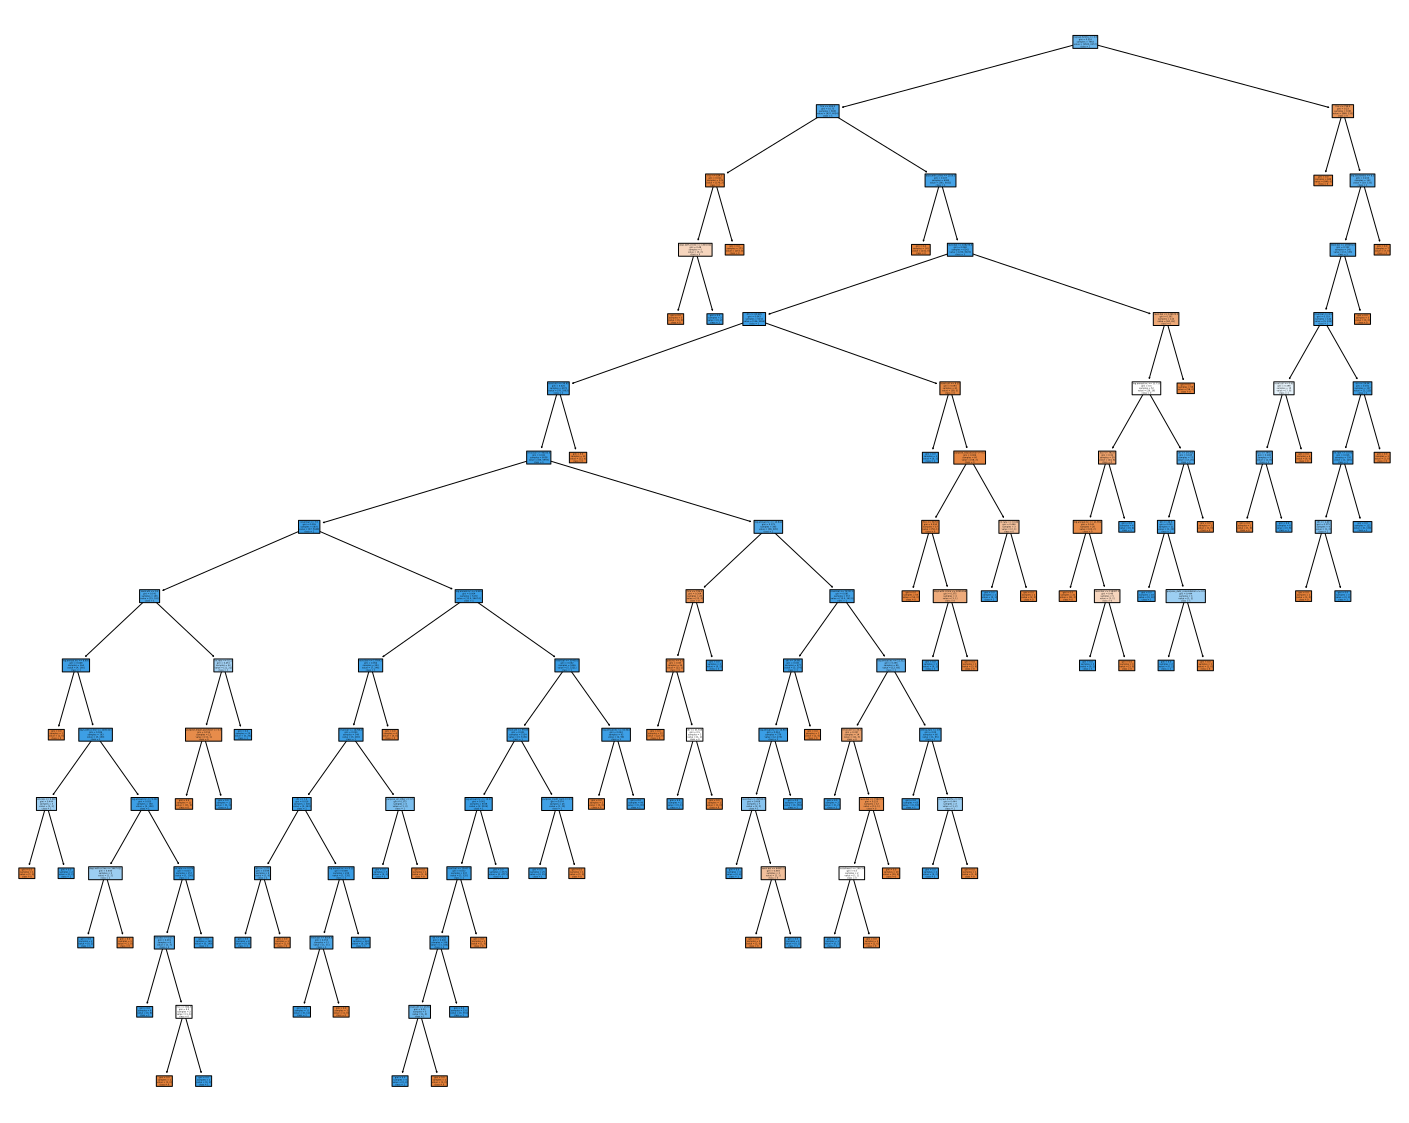

In [38]:
fig = plt.figure(figsize = (25,20))
a = tree.plot_tree(decision_tree = clf,
                   max_depth = None,
                   feature_names = train_X.columns,
                   class_names = clf.classes_ ,
                   filled = True)
plt.savefig("DT_vis.svg")

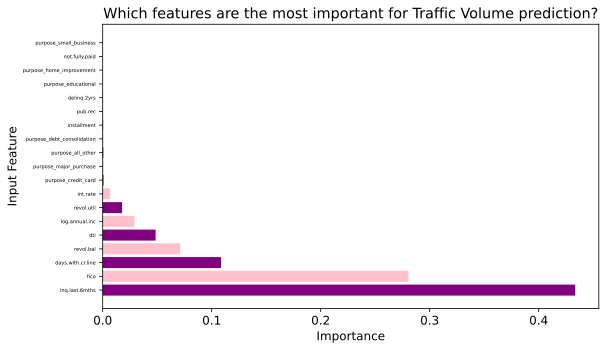

In [39]:
# Storing importance values from the trained model
importance = clf.feature_importances_

# Storing feature importance as a dataframe
feature_imp = pd.DataFrame(list(zip(train_X.columns, importance)),
               columns = ['Feature', 'Importance'])

feature_imp = feature_imp.sort_values('Importance', ascending = False).reset_index(drop = True)

# Bar plot
plt.figure(figsize=(10, 5))
plt.barh(feature_imp['Feature'], feature_imp['Importance'], color = ['purple', 'pink'])

plt.xlabel("Importance")
plt.ylabel("Input Feature")
plt.title('Which features are the most important for Traffic Volume prediction?') 
plt.tight_layout()
plt.yticks(fontsize=5)
plt.savefig("DT_imp.svg");

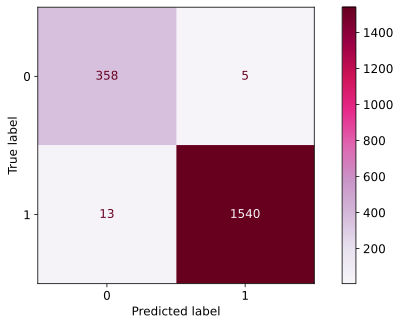

In [40]:
y_pred = clf.predict(test_X)

# Now generate confusion matrix
cm = confusion_matrix(test_y, y_pred, labels = clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = clf.classes_)

# Specify figure size
fig, ax = plt.subplots(figsize = (10, 5))
plt.rcParams.update({'font.size': 12})

# Display Confusion Matrix
disp.plot(cmap = 'PuRd', ax = ax);
plt.savefig("DT_CM.svg")

In [41]:
report = classification_report(test_y, y_pred, output_dict = True)
report_df = pd.DataFrame(report)
report_df.to_csv('DT_CR.csv', index = True)
report_df.head()

,0,1,accuracy,macro avg,weighted avg
precision,0.964960,0.996764,0.990605,0.980862,0.990738
recall,0.986226,0.991629,0.990605,0.988928,0.990605
f1-score,0.975477,0.994190,0.990605,0.984833,0.990644
support,363.000000,1553.000000,0.990605,1916.000000,1916.000000


In [42]:
# Pickle file: saving the trained DT model
# Creating the file where we want to write the model
dt_pickle = open('DT.pickle', 'wb') 

# Write DT model to the file
pickle.dump(clf, dt_pickle) 

# Close the file
dt_pickle.close() 